In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from src.utils import read_pickle

atts_vec = read_pickle("output/cd_24x128_p1_more_complex_20220803_94d2/atts_vec.pkl")

In [ ]:
atts = read_pickle("output/cd_24x128_p1_more_complex_20220803_94d2/atts_vec.pkl")

In [375]:
clus_labels = read_pickle(f"output/cd_24x128_p1_more_complex_20220803_94d2/clus_labels.pkl")

In [6]:
import umap

mapper = umap.UMAP().fit(atts_vec)

In [8]:
from src.vit_data import load_cd_data_24x128_p1

vit_data = load_cd_data_24x128_p1()

In [18]:
idx_120 = np.arange(len(vit_data))[vit_data.times == 120]
tpm_120 = vit_data.unscaled_TPM[idx_120]
log_tpm = np.log2(tpm_120+1)

(array([  14.,   81.,  528., 1604., 1378.,  558.,  183.,   57.,   17.,
           7.]),
 array([ 0.68729119,  2.10368084,  3.52007049,  4.93646013,  6.35284978,
         7.76923943,  9.18562907, 10.60201872, 12.01840837, 13.43479802,
        14.85118766]),
 <BarContainer object of 10 artists>)

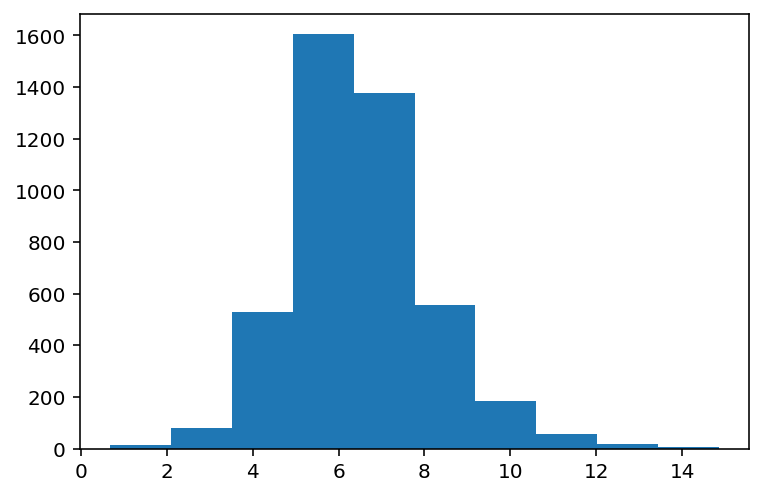

In [19]:
plt.hist(log_tpm)

In [244]:
from src.reference_data import read_sgd_orfs

orfs_data = read_sgd_orfs()

translation_orfs = orfs_data[['GO:0006412' in o for o in orfs_data.ontology.str.split(',')]].index.values
ribosomal_struct_orfs = orfs_data[[('GO:0022625' in o) or ('GO:0022627' in o)
                                   for o in orfs_data.ontology.str.split(',')]].index.values


In [357]:
orfs_data.loc[ribosomal_struct_orfs].head()

,name,chr,start,stop,length,strand,orf_class,ontology
orf_name,,,,,,,,
YAL035W,FUN12,1,76427,79435,3009,+,Verified,"GO:0003743,GO:0003924,GO:0005739,GO:0006413,GO..."
YBL092W,RPL32,2,45645,46370,726,+,Verified,"GO:0003735,GO:0006412,GO:0022625"
YBL087C,RPL23A,2,59822,60739,918,-,Verified,"GO:0003735,GO:0006412,GO:0022625"
YBL072C,RPS8A,2,88523,89440,918,-,Verified,"GO:0000462,GO:0003735,GO:0006412,GO:0022627,GO..."
YBL027W,RPL19B,2,168423,169376,954,+,Verified,"GO:0003735,GO:0006412,GO:0022625"


In [ ]:
a_an

In [247]:
sulfur_orfs = ['YJL101C', 'YOL049W', 'YNL103W', 'YJR060W',
     'YIR017C', 'YPL038W', 'YDR253C', 'YER091C',
     'YLR180W', 'YDR502C', 'YER043C', 'YDR054C',
     'YDL132W', 'YDR328C', 'YIL046W', 'YGR087C',
     'YAL012W', 'YGR155W']

In [374]:
clus_labels

array([ 4,  2, 15, ..., 11,  9,  4], dtype=int32)

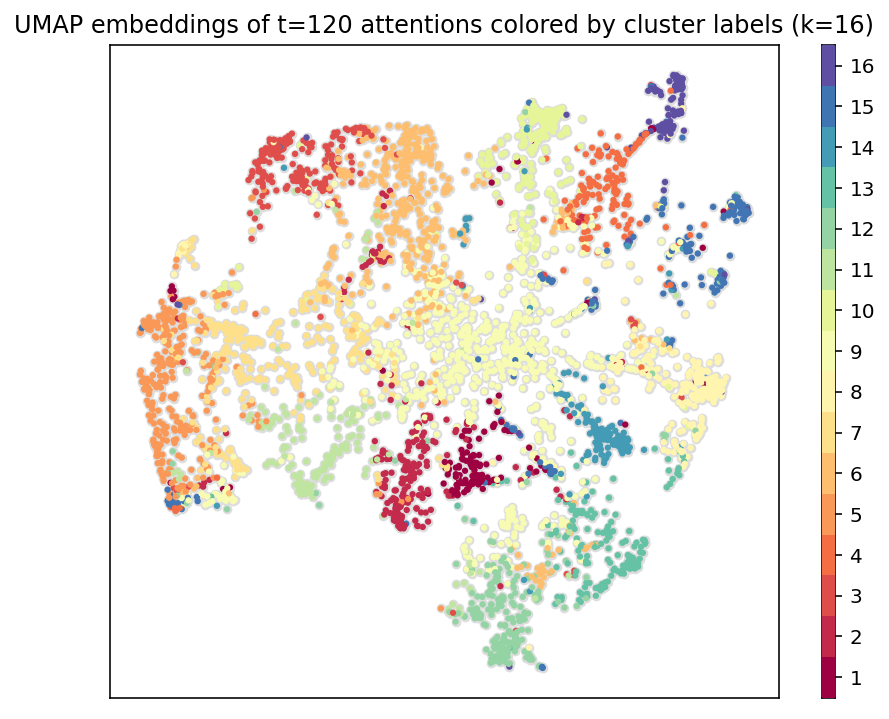

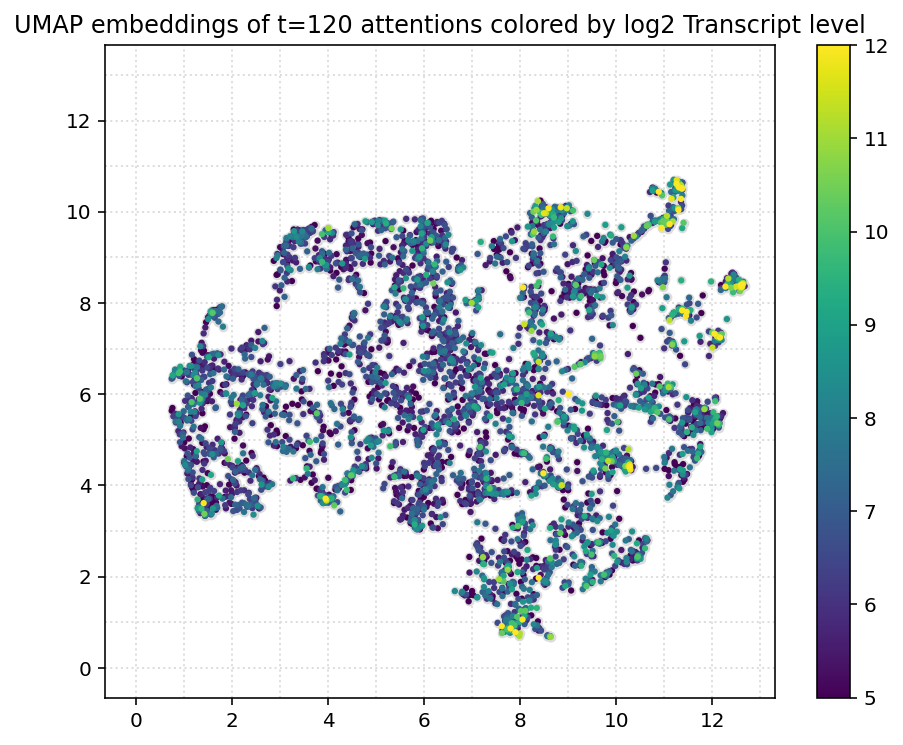

In [380]:
from src.attention_analysis import plot_umap

plot_umap(vit_data, mapper, clus_labels, log_tpm, [])

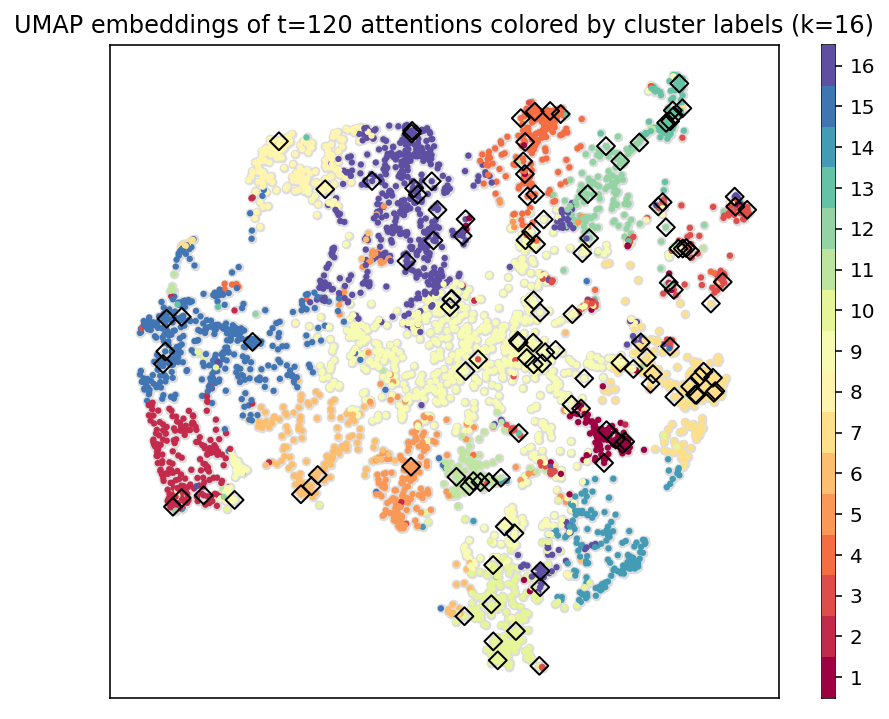

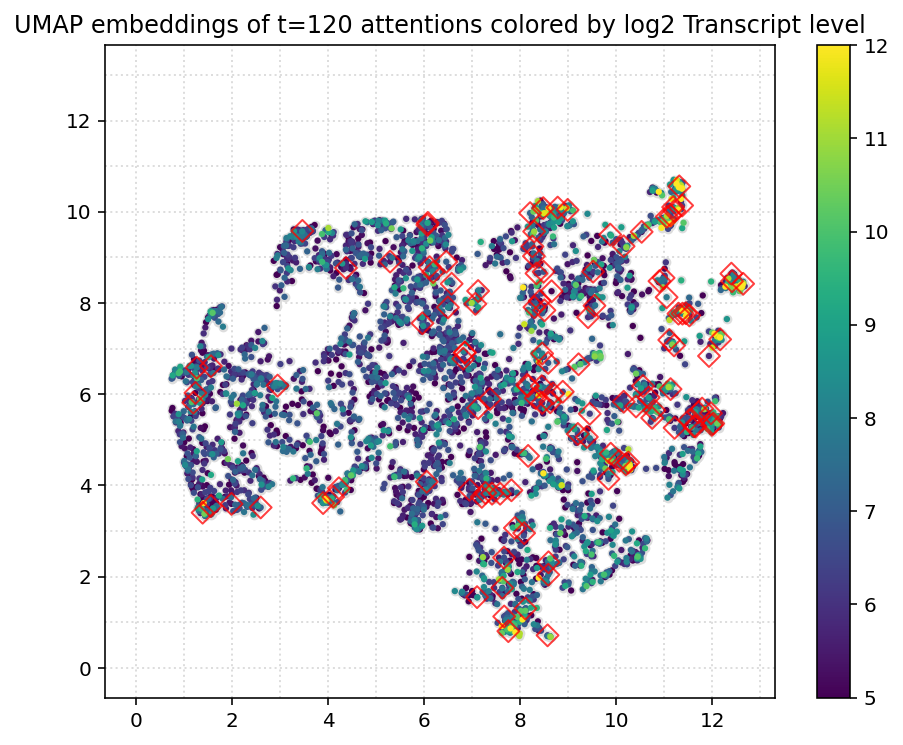

In [373]:
from src.attention_analysis import plot_umap

plot_umap(vit_data, mapper, clus_labels, log_tpm, ribosomal_struct_orfs)


In [280]:
select_idx = ((mapper.embedding_[:, 0]) > 12) & ((mapper.embedding_[:, 1]) > 8)
clust = orfs_120[select_idx]


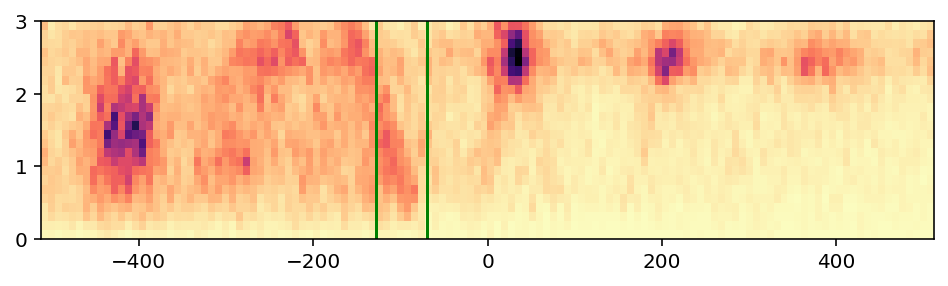

In [327]:
selected_imgs = vit_data.all_imgs[idx_120][select_idx]
composite = selected_imgs.mean(axis=0)[0]
plt.figure(figsize=(8, 2))
plt.imshow(composite, origin='lower', cmap='magma_r', extent=[-512, 512, 0, 3], aspect='auto')
plt.axvline(-128, c='green')
plt.axvline(-70, c='green')

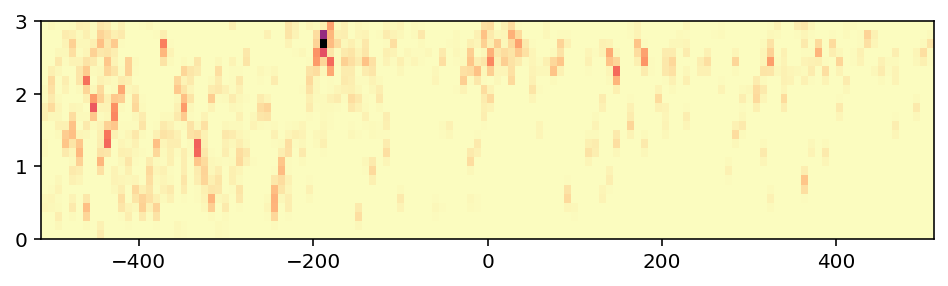

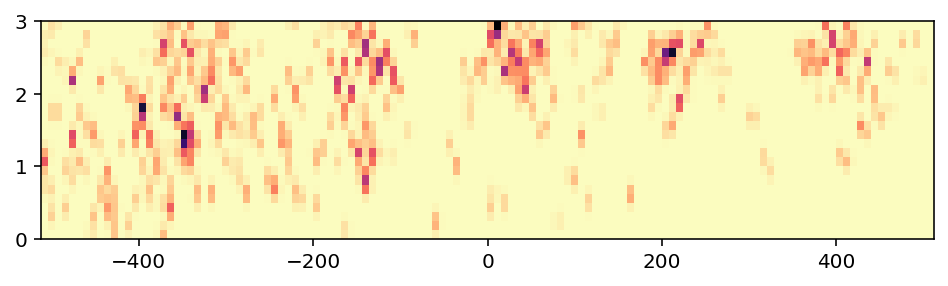

In [323]:
for i in range(2):
    plt.figure(figsize=(8, 2))
    plt.imshow(selected_imgs[i, 0], origin='lower', cmap='magma_r', extent=[-512, 512, 0, 3], aspect='auto')
    

In [315]:
from src.utils import _fromRoman

rossi = pd.read_csv('data/Rossi_Sites_All.txt', sep=' ')
chrom = rossi.chrom.str.replace('chr', '').map(_fromRoman)
rossi['chrom'] = chrom
rossi = rossi[['chrom', 'midpoint', 'name']]

In [337]:
from src.reference_data import read_park_TSS_PAS

search_prom_orfs = orfs_data.loc[orfs_120[select_idx]]
search_prom_orfs = search_prom_orfs.join(read_park_TSS_PAS())[['name', 'chr', 'TSS', 'strand']]


In [348]:
search_span = (-128, -70)

search_prom_orfs['search_start'] = 0
search_prom_orfs['search_end'] = 0

crick_sel = search_prom_orfs.strand == '-'
watson_sel = ~crick_sel

search_prom_orfs.loc[watson_sel, 'search_start'] = search_prom_orfs[watson_sel].TSS + search_span[0]
search_prom_orfs.loc[crick_sel, 'search_start'] = search_prom_orfs[crick_sel].TSS + search_span[0]
